# Lab 4: More dplyr and EDA

In [1]:
set.seed(306)
require(tidyverse)
dm = diamonds[runif(1000, min = 1, max = dim(diamonds)[1]),]
head(dm)

Loading required package: tidyverse
Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


carat,cut,color,clarity,depth,table,price,x,y,z
1.07,Ideal,G,VS2,61.4,57,7275,6.56,6.63,4.05
0.30,Premium,D,VS2,62.3,58,911,4.32,4.29,2.68
0.92,Good,E,SI2,62.0,64,3153,6.20,6.16,3.83
0.30,Ideal,G,VVS1,61.1,57,764,4.32,4.35,2.65
0.72,Ideal,D,VS2,62.7,56,3219,5.65,5.71,3.56
0.71,Ideal,F,SI1,63.0,54,2235,5.73,5.69,3.60


## Mutate

In [3]:
## Without pipe
# dm_dimensions = select(dm, -(carat:price))
# mutate(dm_dimensions,volume = x*y*z)

dm_dimensions = dm %>% 
    select(-(carat:price)) %>%
    mutate(volume = x*y*z)
head(dm_dimensions)

x,y,z,volume
6.56,6.63,4.05,176.1458
4.32,4.29,2.68,49.6679
6.20,6.16,3.83,146.2754
4.32,4.35,2.65,49.7988
5.65,5.71,3.56,114.8509
5.73,5.69,3.60,117.3733


In [5]:
dm_dimensions = dm %>% 
    select(-(carat:price)) %>%
    transmute(volume = x*y*z)
head(dm_dimensions)

volume
176.1458
49.6679
146.2754
49.7988
114.8509
117.3733


Read Section 5.5.1 in the book for more details of the functions.

## Summarise
Generally used with *group_by* function to specify the group

In [6]:
## Without pipe
# by_color <- group_by(dm, color)
# summarise(by_color, avg_price = mean(price, na.rm = TRUE))

by_color = dm %>%
    group_by(color) %>%
    summarise(avg_price = mean(price, na.rm = TRUE))
by_color

color,avg_price
D,2947.910
E,3469.810
F,3918.810
G,4253.656
H,4507.615
I,4401.525
J,5698.058


In [7]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [16]:
mpg2 = mpg %>%
    mutate(year = as.factor(year)) %>% # we are workiong with a categorical variable
    mutate(manual = grepl('manual', trans))
head(mpg2)
class(mpg2$year)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,manual
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,FALSE
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,TRUE
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,TRUE
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,FALSE
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,FALSE
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,TRUE


[1] "factor"

In [18]:
hwy_summary = mpg2 %>%
    group_by(manufacturer, year) %>%
    summarise(count = n(),
              hwy = mean(hwy, na.rm = TRUE),
              cty = mean(cty, na.rm = TRUE))
head(hwy_summary)

manufacturer,year,count,hwy,cty
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238


In [19]:
hwy_summary_ag = hwy_summary %>%
    filter(substring(manufacturer, 1, 1) %in% c('a', 'b', 'c', 'd', 'e', 'f', 'g'))
hwy_summary_ag

manufacturer,year,count,hwy,cty
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000


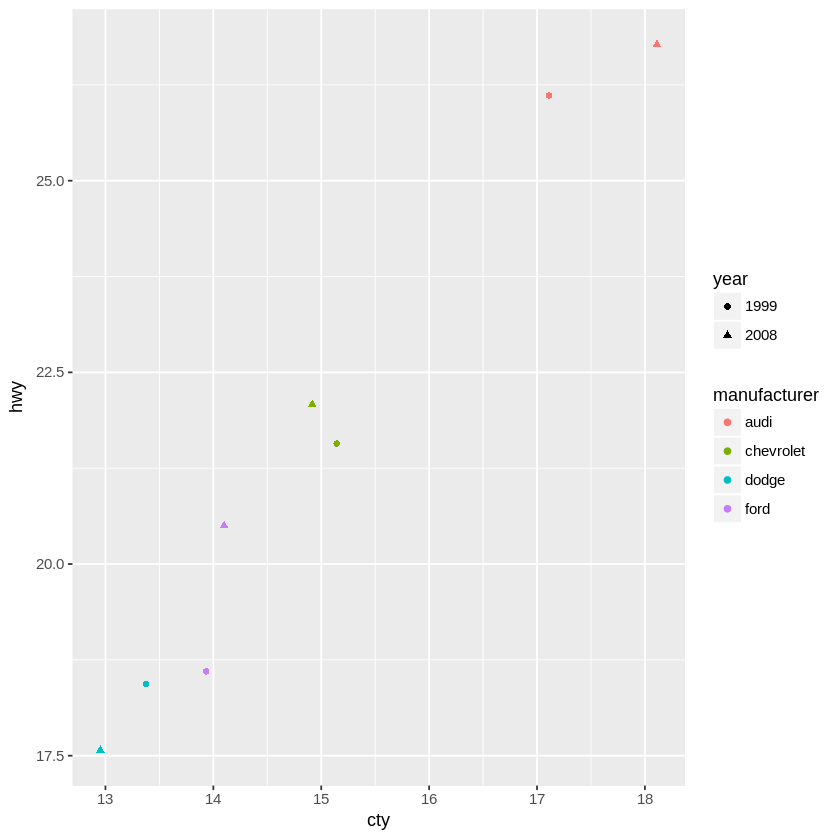

In [20]:
ggplot(data = hwy_summary_ag, mapping = aes(x = cty, y = hwy)) + 
geom_point(mapping = aes(color = manufacturer, shape = year))

### Exercises
1. Load the nycflights library to get the dataset
2. PErform the following using pipes: 1) Group flights by destination, 2) Report counts of flights, mean of distance and mean of arrival delay, 3) Filter the result to exclude airports with fewer than 20 flights and the Albequerque airport
3. How might you get rid of the NA values in the arrival delay?

# Exploratory Data Analysis
Very useful paragraph from the book: 
"EDA is fundamentally a creative process. And like most creative processes, the key to asking quality questions is to generate a large quantity of questions. It is difficult to ask revealing questions at the start of your analysis because you do not know what insights are contained in your dataset. On the other hand, each new question that you ask will expose you to a new aspect of your data and increase your chance of making a discovery. You can quickly drill down into the most interesting parts of your data—and develop a set of thought-provoking questions—if you follow up each question with a new question based on what you find."
## Visualizing distributions
### Exercise
How can we plot the frequency of each level of the cut variable?

In [22]:
diamonds %>% count(cut)

cut,n
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


In [23]:
## Histograms for the continuous variables


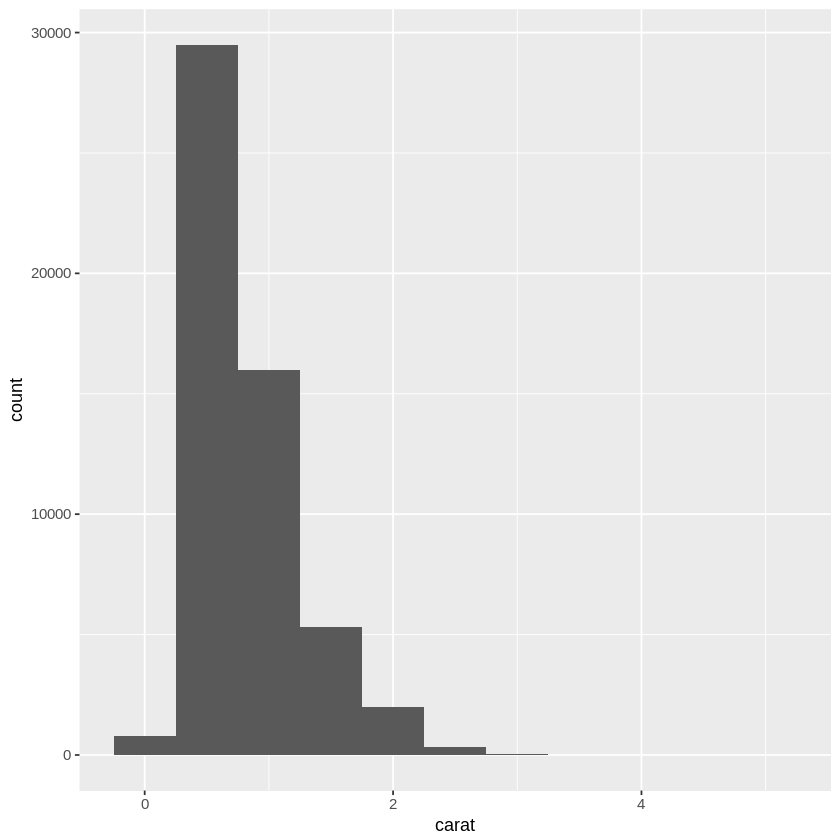

In [27]:
ggplot(data = diamonds, mapping = aes(x=carat)) +
    geom_histogram(binwidth = 0.5)

In [28]:
diamonds %>%
    count(cut_width(carat, 0.5))

"cut_width(carat, 0.5)",n
"[-0.25,0.25]",785
"(0.25,0.75]",29498
"(0.75,1.25]",15977
"(1.25,1.75]",5313
"(1.75,2.25]",2002
"(2.25,2.75]",322
"(2.75,3.25]",32
"(3.25,3.75]",5
"(3.75,4.25]",4
"(4.25,4.75]",1


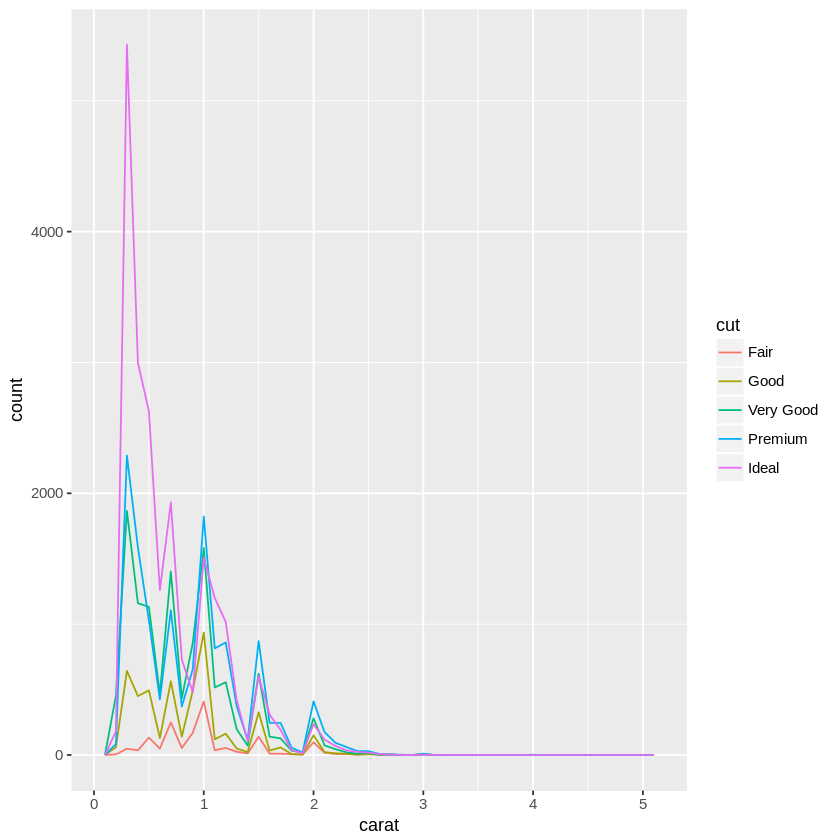

In [31]:
ggplot(data = diamonds, mapping = aes(x = carat, colour = cut)) +
  geom_freqpoly(binwidth = 0.1)

Analyze the histogram below with the following questions
1. What's so special about the carat amounts that have such high peaks?
2. Why are there more diamonds slightly to the right of each peak than there are slighly to the left of each peak?
3. What can be considered an extreme weight for a diamond?


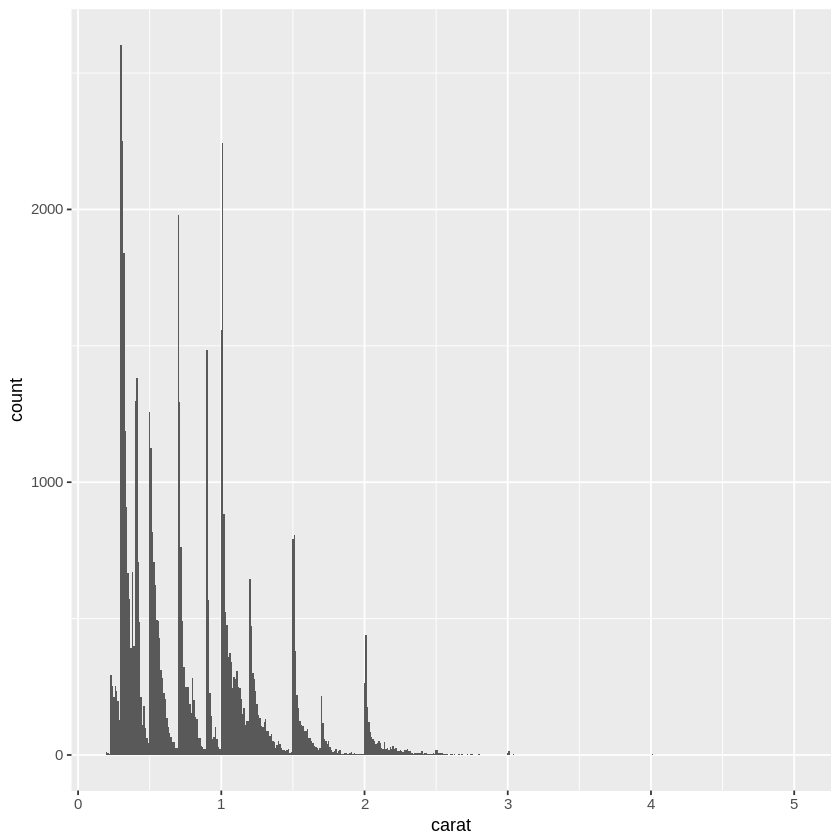

In [32]:
ggplot(data = diamonds, mapping = aes(x = carat)) +
  geom_histogram(binwidth = 0.01)

Length (in minutes) of 272 eruptions of the Old Faithful Geyser in Yellowstone National Park. Eruption times appear to be clusted into two groups

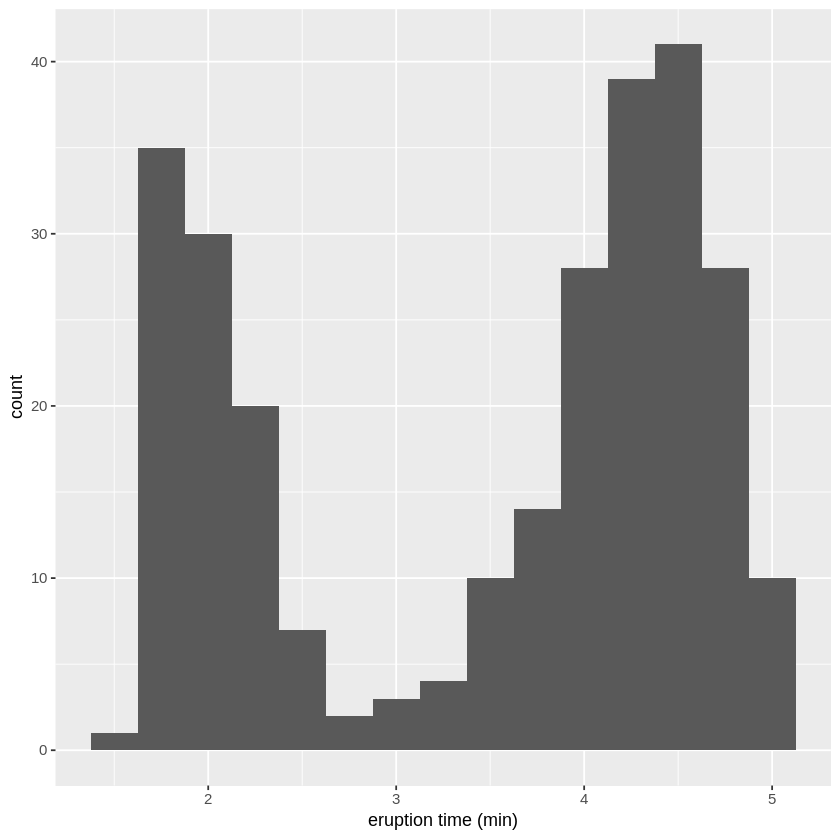

In [34]:
ggplot(data = faithful, mapping = aes(x = eruptions)) + 
    geom_histogram(binwidth = 0.25) + 
    labs(x = "eruption time (min)")

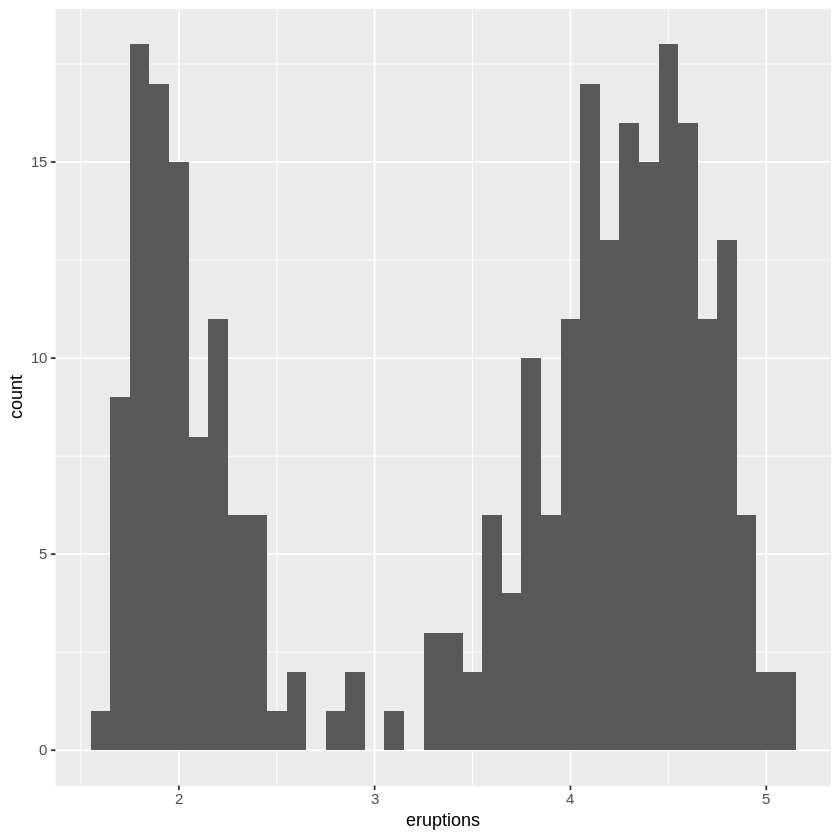

In [35]:
ggplot(data = faithful, mapping = aes(x = eruptions)) + 
    geom_histogram(binwidth = 0.1)

## Outliers
When you have a lot of data, outliers are sometimes difficult to see in a histogram. For example, take the distribution of the y variable from the diamonds dataset. The only evidence of outliers is the unusually wide limits on the x-axis.

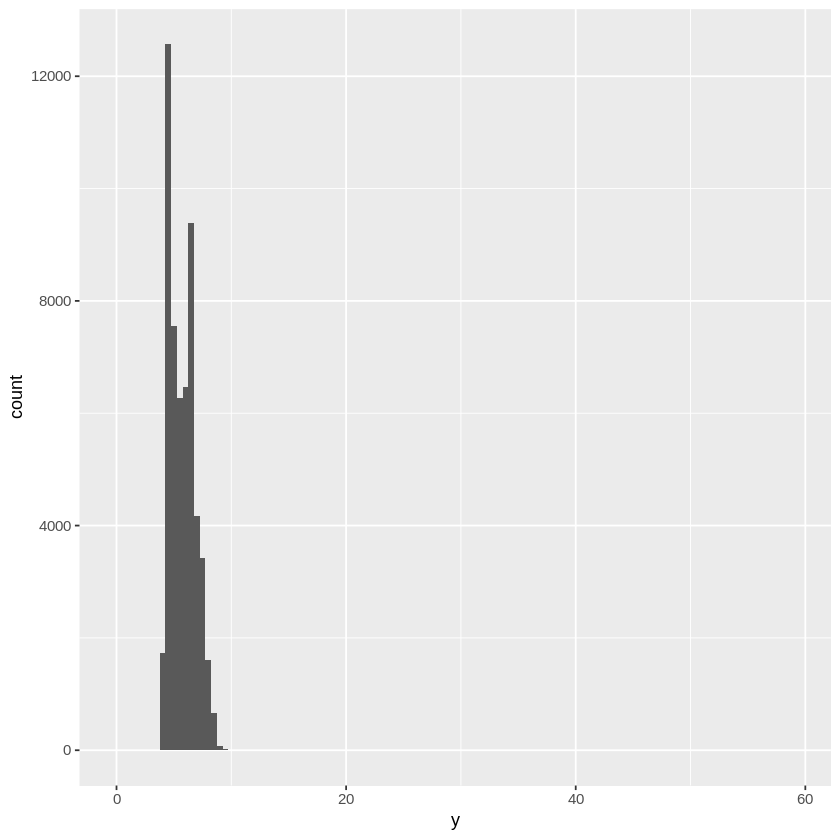

In [37]:
ggplot(diamonds, mapping = aes(x = y)) + 
    geom_histogram(binwidth = 0.5)

To make it easy to see the unusual values, we need to zoom to small values of the y-axis with coord_cartesian()

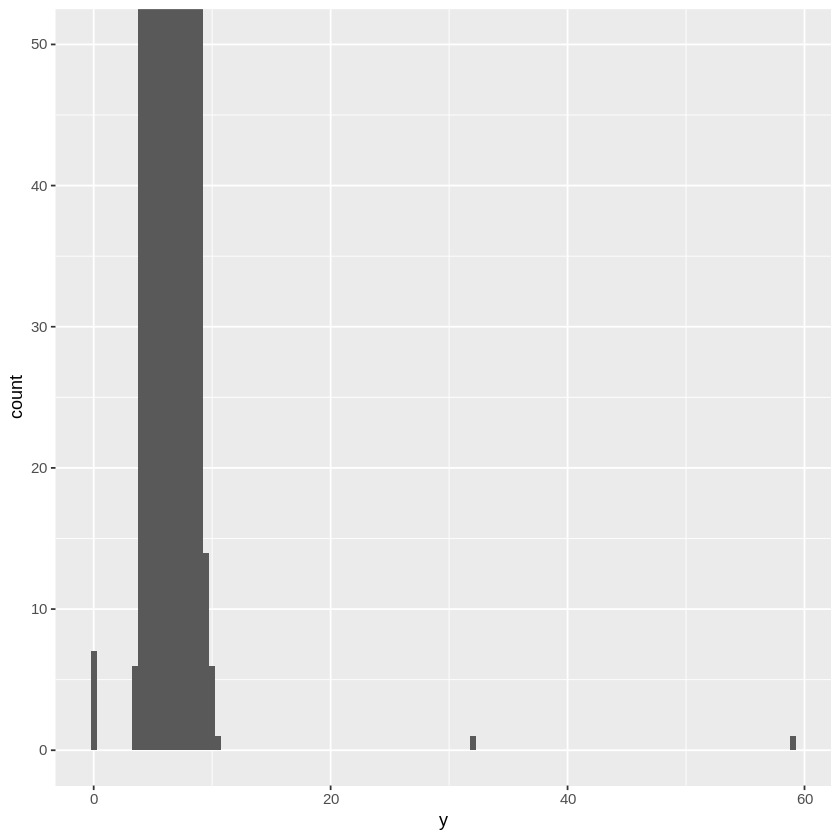

In [39]:
ggplot(diamonds) + 
    geom_histogram(mapping = aes(x = y), binwidth = 0.5) +
    coord_cartesian(ylim = c(0, 50))

ggplot2 also has xlim() and ylim() functions that work slightly differently: they throw away the data outside the limits.

Let us look at the three unusual values: 0, ~30, and ~60.

In [41]:
unusual <- diamonds %>% 
  filter(y < 3 | y > 20) %>% 
  select(price, x, y, z) %>%
  arrange(y)
unusual

price,x,y,z
5139,0.00,0.0,0.00
6381,0.00,0.0,0.00
12800,0.00,0.0,0.00
15686,0.00,0.0,0.00
18034,0.00,0.0,0.00
2130,0.00,0.0,0.00
2130,0.00,0.0,0.00
2075,5.15,31.8,5.12
12210,8.09,58.9,8.06


Exercises
Explore the distribution of each of the x, y, and z variables in diamonds. What do you learn? Think about a diamond and how you might decide which dimension is the length, width, and depth.

1. Explore the distribution of price. Do you discover anything unusual or surprising? (Hint: Carefully think about the binwidth and make sure you try a wide range of values.)

2. How many diamonds are 0.99 carat? How many are 1 carat? What do you think is the cause of the difference?

3. Compare and contrast coord_cartesian() vs xlim() or ylim() when zooming in on a histogram. What happens if you leave binwidth unset? What happens if you try and zoom so only half a bar shows?

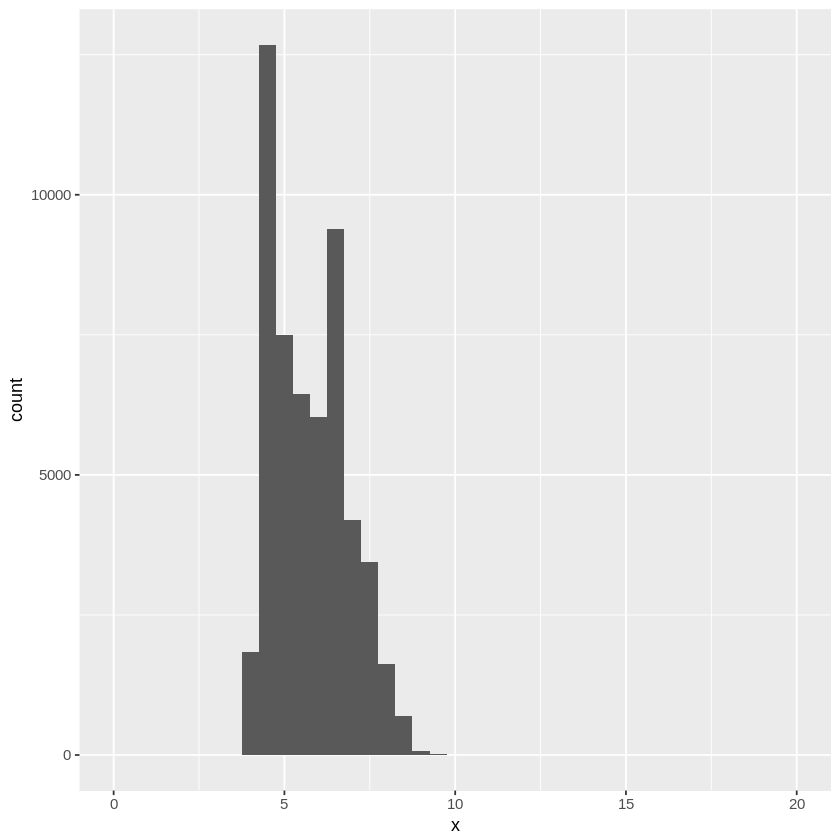

In [43]:
ggplot(diamonds, mapping = aes(x = x)) + 
    geom_histogram(binwidth = 0.5) + 
    coord_cartesian(xlim = c(0, 20))

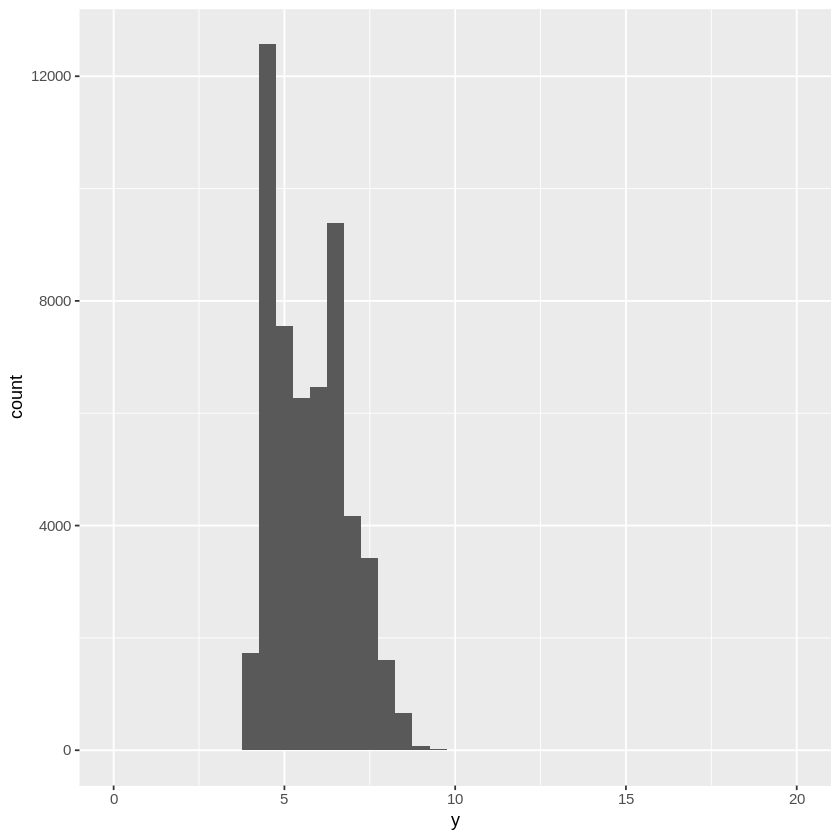

In [44]:
ggplot(diamonds, mapping = aes(x = y)) + 
    geom_histogram(binwidth = 0.5) + 
    coord_cartesian(xlim = c(0, 20))

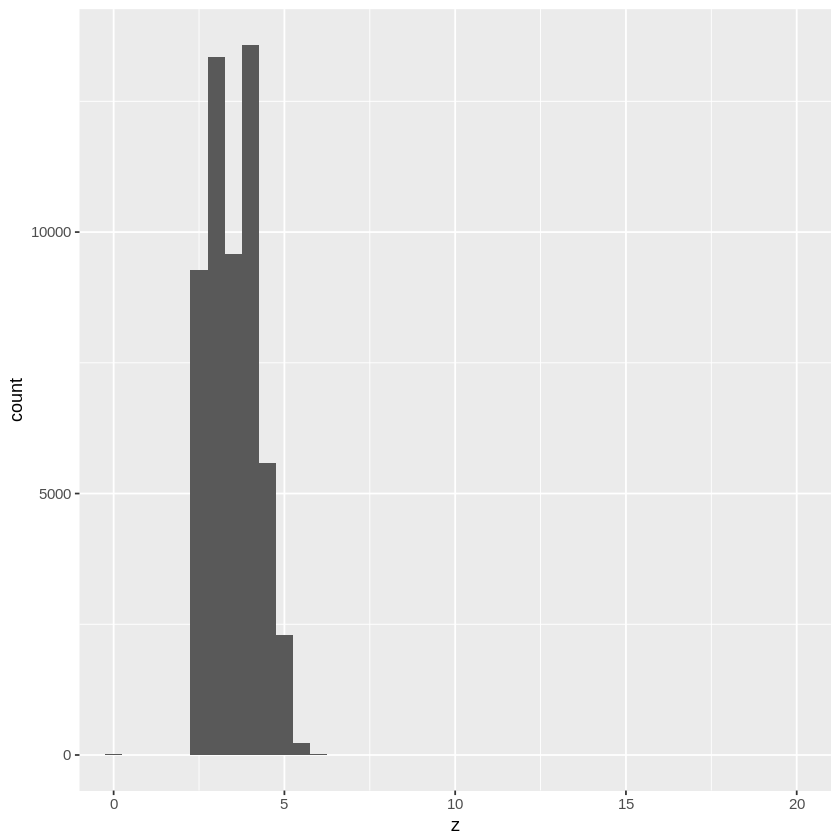

In [45]:
ggplot(diamonds, mapping = aes(x = z)) + 
    geom_histogram(binwidth = 0.5)+
    coord_cartesian(xlim = c(0, 20))

Explore the distribution of price. Do you discover anything unusual or surprising? (Hint: Carefully think about the binwidth and make sure you try a wide range of values.)

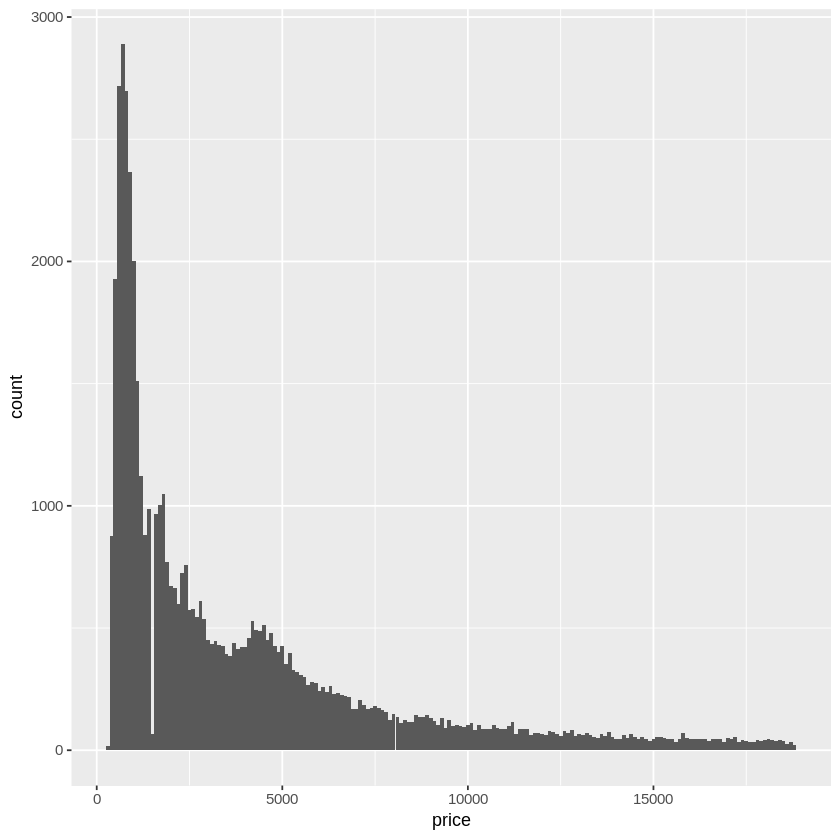

In [46]:
ggplot(data = diamonds, mapping = aes(x = price)) + 
    geom_histogram(binwidth = 100)

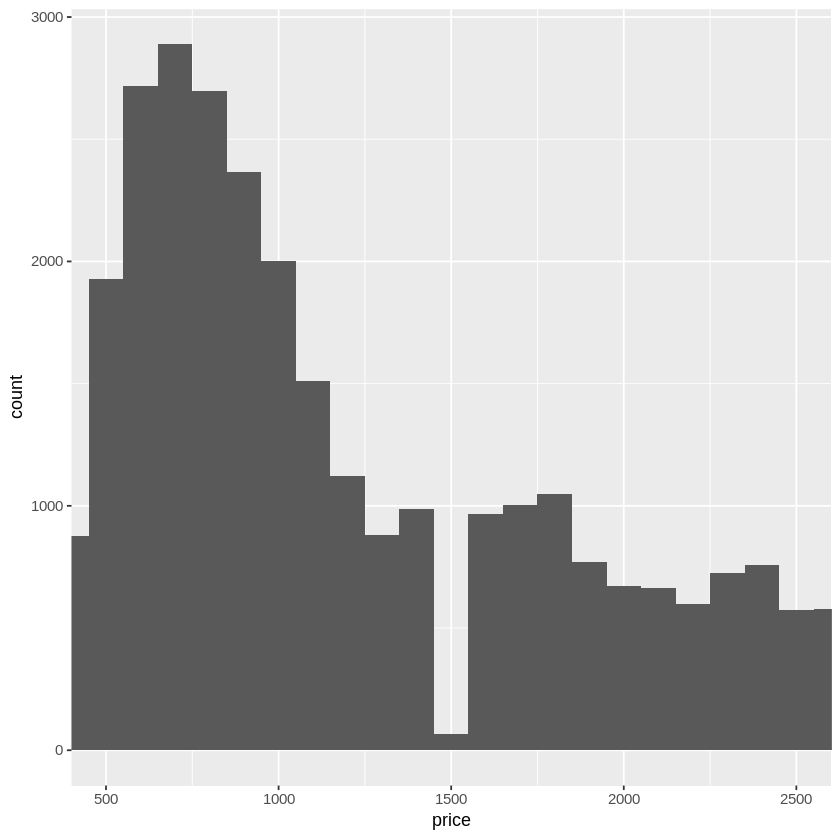

In [47]:
ggplot(data = diamonds, mapping = aes(x = price)) + 
    geom_histogram(binwidth = 100) + 
    coord_cartesian(xlim = c(500,2500))

In [48]:
diamonds %>% filter(price > 1490 & price < 1510) %>% select(price, x, y, z)

price,x,y,z


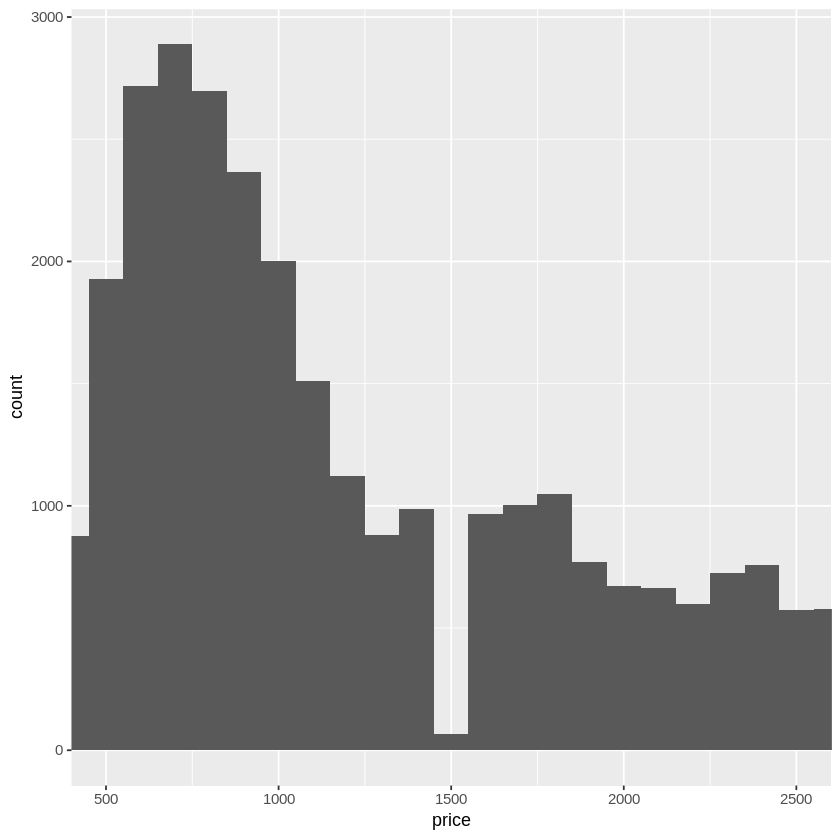

In [49]:
ggplot(data = diamonds, mapping = aes(x = price)) + 
    geom_histogram(binwidth = 100) + 
    coord_cartesian(xlim = c(500,2500))

Warning message:
“Removed 31462 rows containing non-finite values (stat_bin).”

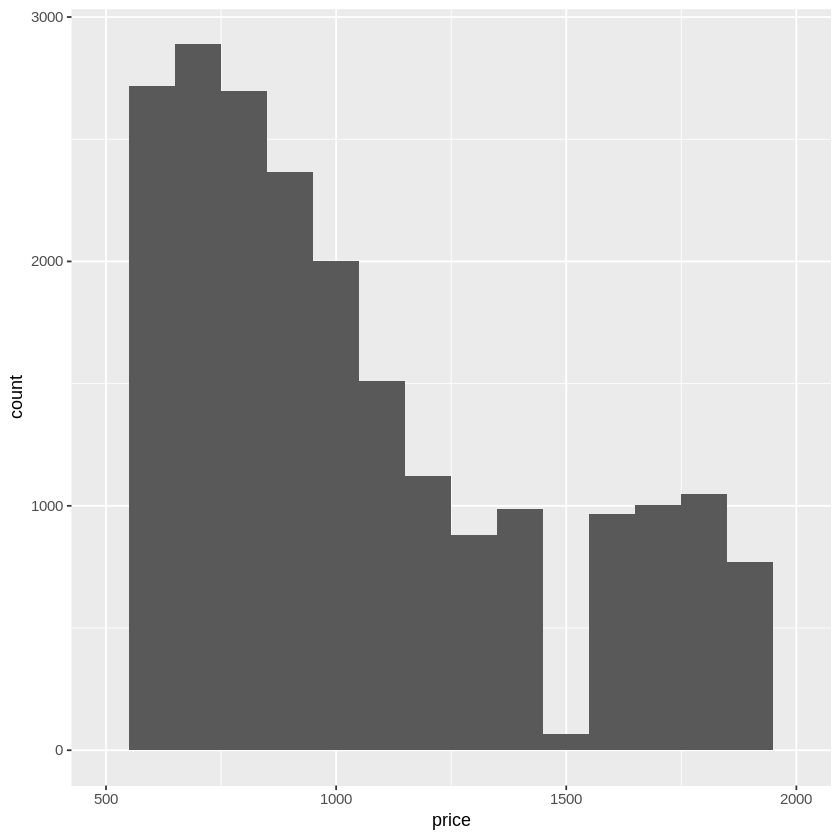

In [50]:
ggplot(data = diamonds, mapping = aes(x = price)) + 
    geom_histogram(binwidth = 100) + 
    # coord_cartesian(xlim = c(500,2000))
    xlim(c(500, 2000))